Linear chain with different masses:     A model for the calculation of lattice vibration modes of the crystal elements <br>
Eigenvalues: energy bands of the photon:                                  w^2: eigen values <br>
Eigenvectors: vibration modes of the crystal:                              S(q): normal modes <br>
Superposition of eigenmodes: represents every possible motion of solid:    x(n): eigenmodes <br>
                           : general solution 

In [ ]:
#(2f  -f  0  -fexp(-iqa))
#(-f  2f  -f 0)
#(0  -f   2f  -f)  S  =  w^2   (m) S
#(0  -f  2f  -f)
#(-fexp(iqa)  0  -f  2f)

# x = Sexp(iqan+-iwt)

# x(doubledot) = -(w^2)x
# x_n+1 = exp(+-iqa)x_n

#FS = M(lambda)S where labda = (w^2) = eigenvalues
#Inverse: (M^-1)FS = (lambda)S
#(M^-1/2)F(M^-1/2)(M^1/2)S = (lambda)(M^1/2)S 
#where (M^-1/2)F(M^-1/2) = positive semidefinite Hermitian matrix with eigenvector (M^1/2)S

In [5]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Mary\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


(array([ 8.91547595e+00+8.66961793e-18j, -1.45488706e-15-1.01534985e-16j,
        5.00000000e+00-8.07885965e-17j,  3.08452405e+00-9.57453096e-19j]), array([[-5.18871540e-01-4.19002807e-17j,  5.00000000e-01-5.39690847e-17j,
        -7.07106781e-01+4.83344563e-18j,  2.86128473e-01+2.35563822e-17j],
       [ 6.62590637e-01+0.00000000e+00j,  5.00000000e-01-5.42651115e-17j,
        -4.92823141e-17+2.03112027e-17j,  7.46886103e-01+0.00000000e+00j],
       [-5.18871540e-01-6.27220439e-17j,  5.00000000e-01+0.00000000e+00j,
         7.07106781e-01+0.00000000e+00j,  2.86128473e-01-9.86236683e-18j],
       [ 1.50060978e-01+7.74736016e-18j,  5.00000000e-01-5.41541015e-17j,
        -4.35518010e-17-6.25425595e-18j, -5.27657220e-01-2.00059668e-17j]]))


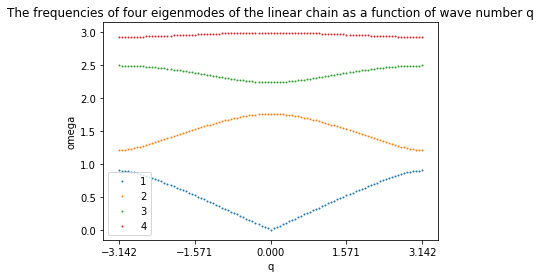

In [18]:
#Limited to small displacements
def main(f=1, m1 = 0.4, m2 = 1.0, plot_step = np.pi/50): #**kwargs): #m1 = light, m2 = heavy, f = spring constant
    mat1 = lambda q: np.array([[            2*f,    -f,    0,-f*np.exp(-1j*q)],
                               [             -f,   2*f,   -f,               0],
                               [              0,    -f,  2*f,              -f],
                               [-f*np.exp(1j*q),     0,   -f,             2*f]])     #matrix F
    massmat = np.diag([m1,m1,m1,m2])     #matrix M
    mat2 = lambda q: np.linalg.inv(massmat).dot(mat1(q))
    x_axis = np.arange(-np.pi,np.pi+plot_step,plot_step) # q values
    eigenlist = [np.linalg.eigvals(mat2(x)) for x in x_axis]
    #numpy.linalg.eigvals(a): Compute the eigenvalues of a general matrix.
    #numpy.linalg.eig(a): Compute the eigenvalues and right eigenvectors of a square array.
    for i in range(4):
        lbel = str(i+1)
        plt.scatter(x_axis, np.ndarray.transpose(np.array(np.sqrt(np.sort(eigenlist))))[i],s=1, label=lbel)
    #plt.plot(x_axis, np.sqrt(eigenlist),'o')
    plt.xlabel('q')
    plt.ylabel('omega')
    plt.xticks(np.linspace(-np.pi,np.pi,5))
    plt.legend()
    plt.title('The frequencies of four eigenmodes of the linear chain as a function of wave number q')
    eigensys = np.linalg.eig(mat2(0.0))
    return eigensys
print(main())

# **kwargs help give arbitrary keyworded arguments to a function and access them later in a dictionary
# plot_step = kwargs.get('plot_step', np.pi/50) # pass a default value to get() for keys that are not in the dictionary

In [13]:
#lowest branch: acoustic phonons, adjacent atoms oscillate in the same direction, (+) and (-) ions swing together
             #: q = 0: entire chain is shifted as a whole, which does not require any energy (w = 0)
#3 upper branches: optical phonons, many atoms oscillating against each other, (+) and (-) ions swing against each other
             #: q = 0: requires energy 

For a one-dimensional alternating array of two types of ion or atom of mass m1, m2 repeated periodically at a distance a, <br>
connected by springs of spring constant K, two modes of vibration result:[8]

${\displaystyle \omega _{\pm }^{2}=K\left({\frac {1}{m_{1}}}+{\frac {1}{m_{2}}}\right)\pm K{\sqrt {\left({\frac {1}{m_{1}}}+{\frac {1}{m_{2}}}\right)^{2}-{\frac {4\sin ^{2}{\frac {ka}{2}}}{m_{1}m_{2}}}}},} {\displaystyle \omega _{\pm }^{2}=K\left({\frac {1}{m_{1}}}+{\frac {1}{m_{2}}}\right)\pm K{\sqrt {\left({\frac {1}{m_{1}}}+{\frac {1}{m_{2}}}\right)^{2}-{\frac {4\sin ^{2}{\frac {ka}{2}}}{m_{1}m_{2}}}}},}$
where k is the wavevector of the vibration related to its wavelength by ${\displaystyle k={\frac {2\pi }{\lambda }}} k={\frac  {2\pi }{\lambda }}$.

The connection between frequency and wavevector, ω = ω(k), is known as a dispersion relation. The plus sign results in the so-called optical mode, and the minus sign to the acoustic mode. In the optical mode two adjacent different atoms move against each other, while in the acoustic mode they move together.

The speed of propagation of an acoustic phonon, which is also the speed of sound in the lattice, is given by the slope of the acoustic dispersion relation, 
∂ωk
/
∂k
 (see group velocity.) At low values of k (i.e. long wavelengths), the dispersion relation is almost linear, and the speed of sound is approximately ωa, independent of the phonon frequency. As a result, packets of phonons with different (but long) wavelengths can propagate for large distances across the lattice without breaking apart. This is the reason that sound propagates through solids without significant distortion. This behavior fails at large values of k, i.e. short wavelengths, due to the microscopic details of the lattice.

For a crystal that has at least two atoms in its primitive cell, the dispersion relations exhibit two types of phonons, namely, optical and acoustic modes corresponding to the upper blue and lower red curve in the diagram, respectively. The vertical axis is the energy or frequency of phonon, while the horizontal axis is the wavevector. The boundaries at −
π
/
a
 and 
π
/
a
 are those of the first Brillouin zone.[8] A crystal with N ≥ 2 different atoms in the primitive cell exhibits three acoustic modes: one longitudinal acoustic mode and two transverse acoustic modes. The number of optical modes is 3N – 3. The lower figure shows the dispersion relations for several phonon modes in GaAs as a function of wavevector k in the principal directions of its Brillouin zone.[7]

Many phonon dispersion curves have been measured by neutron scattering.

The physics of sound in fluids differs from the physics of sound in solids, although both are density waves: sound waves in fluids only have longitudinal components, whereas sound waves in solids have longitudinal and transverse components. This is because fluids can't support shear stresses (but see viscoelastic fluids, which only apply to high frequencies)


Chain Vibrations



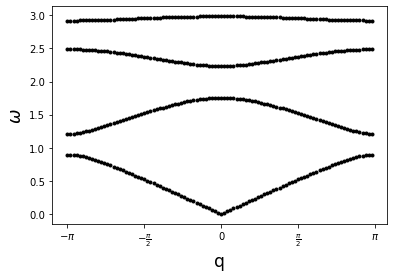


Eigenvectors for q = 0: [[5.18871540e-01 5.00000000e-01 7.07106781e-01 2.86128473e-01]
 [6.62590637e-01 5.00000000e-01 5.33037657e-17 7.46886103e-01]
 [5.18871540e-01 5.00000000e-01 7.07106781e-01 2.86128473e-01]
 [1.50060978e-01 5.00000000e-01 4.39985806e-17 5.27657220e-01]]


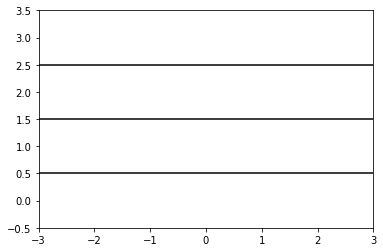

In [4]:
print("\nChain Vibrations\n")

# Initialize system parameters and matrices
f = 1.0 # Spring Constant
m1 = 0.4
m2 = 1.0

F = lambda q: np.array([[2*f, -f, 0, -f*np.exp(-1j*q)],
                        [-f, 2*f, -f, 0],
                        [0, -f, 2*f, -f],
                        [-f*np.exp(1j*q), 0, -f, 2*f]])
M = np.diag([m1, m1, m1, m2])

# Set-up eigenvalue matrix
eig_mat = lambda q: inv(M).dot(F(q))


# Plot eigenvalues (normal mode frequencies) as a function of wavenumber
x_axis = np.arange(-np.pi, np.pi, np.pi/50)
eigenlist = [eigvals(eig_mat(x)) for x in x_axis]
eigenlist_2 = np.sqrt(np.abs(eigenlist))

# Figure 2.12: Frequencies of the four eigenmodes of the linear chain.
plt.figure(1)
plt.plot(x_axis, eigenlist_2, "k.")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r"$-\pi$", r"$-\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$",
            r"$\pi$"])
plt.xlabel('q', size='xx-large')
plt.ylabel(r'$\omega$', size='xx-large')
plt.show()

# Print eigenvectors for q = 0
eigen_sys = eig(eig_mat(0.0))
omega = np.sqrt(np.abs(eigen_sys[0])) # Normal Mode Frequencies
eigen_vecs = np.abs(eigen_sys[1]) # Eigenvectors
print("\nEigenvectors for q = 0:", eigen_vecs)

# Start of anime code
fig, ax = plt.subplots()
ln, = plt.plot([], [], 'ro', ms=20, animated=True)
t = np.linspace(0, 10, 1000) # Time of anime

# Plot line dividers 
plt.plot([-3,3], [0.5, 0.5], 'k')
plt.plot([-3,3], [1.5, 1.5], 'k')
plt.plot([-3,3], [2.5, 2.5], 'k')


def init():
    """
    Initial values of the plot and axis limits.
    """
    ax.set_xlim(-3, 3)
    ax.set_ylim(-0.5, 3.5)
    ln.set_data([], [])
    return ln,
    
def update(frame):
    """
    Function called for every frame in the animation. Each s_# is a vector
    containing the displacement functions of the mass for a given frequency of
    oscillation. 
    Amplitude of oscillation came from eigenvectors.
    Frequency of oscillation came from the eigenvalues.
    """
    s1 = eigen_vecs[:,1]*np.sin(omega[0]*frame) + np.array([-1.8, -0.6, 0.6, 
                   1.8])
    s2 = eigen_vecs[:,3]*np.array([np.sin(omega[0]*frame), 
                   np.sin(omega[0]*frame), np.sin(omega[0]*frame), 
                   np.sin(omega[0]*frame + np.pi)]) + np.array([-1.8,-0.6,0.6,
                   1.8])
    s3 = eigen_vecs[:,2]*np.array([np.sin(omega[0]*frame), 
                   np.sin(omega[0]*frame), np.sin(omega[0]*frame + np.pi), 
                   np.sin(omega[0]*frame)]) + np.array([-1.8,-0.6,0.6,1.8])  
    s4 = eigen_vecs[:,0]*np.array([np.sin(omega[0]*frame), 
                   np.sin(omega[0]*frame + np.pi), np.sin(omega[0]*frame), 
                   np.sin(omega[0]*frame)]) + np.array([-1.8,-0.6,0.6,1.8])
    
    # Set positions of masses along the y-axis (four masses each position).
    y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])
    
    ln.set_data(np.concatenate((s1, s2, s3, s4)), y)
    return ln,

anim = FuncAnimation(fig, update, frames=t, init_func=init, blit=True, 
                     interval=10, repeat=True)
